In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Obtaning the df. about 

In [2]:
df_suicide = pd.read_csv('data/master.csv')

In [3]:
df_suicide.sample()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
21937,San Marino,1999,female,5-14 years,0.0,1227,0.0,San Marino1999,NaN,"1,21,56,40,315",48255.0,Millenials


In [4]:
df_suicide.country.unique() # checking if United Kingdom is included in the list of countries of the DF

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

### Cleaning data in order to get the suicide rates from 2005 in the United Kingdom to see the pre and post retransmission of Love Island

In [5]:
import src.cleaning as clean

In [6]:
df_suicide = clean.cl_colm(df_suicide) # cleaning columns

In [7]:
df_suicide_uk = clean.cl_country_year_null(df_suicide) # cleaning countries, years<2004 and null values


In [8]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26767,United Kingdom,2009,male,75+ years,195.0,1911370,Silent


## Obtaining via web scraping the releases Love Island until 2020

In [9]:
import src.scrp as sc

### Getting the info from Love Island 

In [10]:
url='https://thetvdb.com/series/love-island/allseasons/official'

In [11]:
soup = sc.extrc(url) # Importing all the info from the website

In [12]:
love_island_date = soup.find_all("ul", attrs={'class':'list-inline text-muted'}) # Getting the dates of each episode
love_island_date[1]

<ul class="list-inline text-muted">
<li>June 8, 2015</li>
<li>ITV2</li>
</ul>

### Cleaning the data for the dates

In [13]:
lst_date= sc.clearance_date(love_island_date)

In [14]:
lst_date[2]

['June', '9', '2015']

In [15]:
year= sc.def_year(lst_date)
year[1]

'2015'

In [16]:
month= sc.def_month(lst_date)
month[0]

'June'

### Getting the data of seasons and episodes

In [17]:
love_island_episode= soup.find_all("span", attrs={'class':'text-muted'}) # Getting the list of episodes with seasons
love_island_episode[10]

<span class="text-muted episode-label">S01E11</span>

In [18]:
import src.scrp_epis as sc2

In [19]:
season_episode = sc2.episode_season(love_island_episode) #split the season and episodes

In [20]:
lst_episodes = sc2.episodes(season_episode) # creating a list of episodes to include in a new DF

In [21]:
lst_seasons = sc2.seasons(season_episode)# creating a list of seasons linked with episodes to include in a new DF

### Creating a DF with all the data above

In [22]:
import src.loveislanddf as lidf

In [23]:
love_island_dict=lidf.dictionary(lst_seasons,lst_episodes,year,month) # defining a dictionary of lists

In [24]:
df_loveisland_until_2020= lidf.dfloveisland (love_island_dict) # defining the dictionary

In [25]:
df_loveisland_until_2020.sample()

,Season,Episode,Year,Month
209,5,23,2019,June


## Analysis

### checking the information can be related with both DF, in this cas, the years

In [26]:
import src.groupby as gb

In [27]:
df_loveisland_until_2020.Season.unique()

array([1, 2, 3, 4, 5])

In [28]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
29784,United Kingdom,2017,male,75+ years,234.0,66058859,G.I. Generation


In [29]:
df_suicide_uk.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2019, 2018, 2017])

In [30]:
df_suicide_ages = gb.group_suici_age (df_suicide_uk) # Group by ages and years the suicide rates
df_suicide_ages


suicides_no
age         year             
15-24 years 2005        384.0
            2006        382.0
            2007        379.0
            2008        404.0
            2009        416.0
...                       ...
75+ years   2014        340.0
            2015        381.0
            2017        338.0
            2018        413.0
            2019        372.0

[84 rows x 1 columns]

In [31]:
df_distr_epi = gb.group_season_epi (df_loveisland_until_2020)
df_distr_epi

,,Episode
Season,Year,
1,2015,34
2,2016,44
3,2017,51
4,2018,58
5,2019,58


## Figures for suicide

- As can be check of the graph below the ages in between XXXXXXX have a raise on the suicide rates

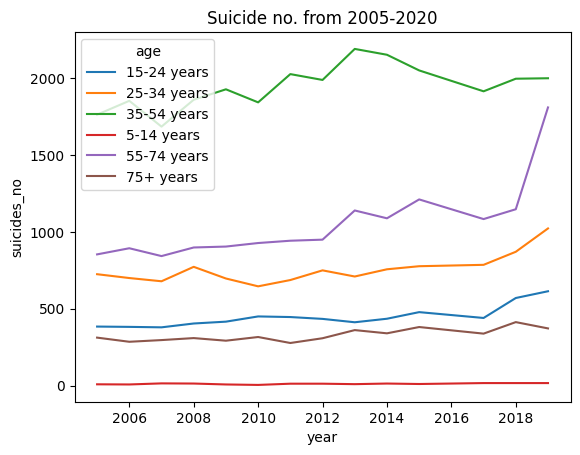

In [42]:

suicide_ages = sns.lineplot(data=df_suicide_ages, x="year", y="suicides_no", hue="age").set(title="Suicide no. from 2005-2020");

## Figures for Love island

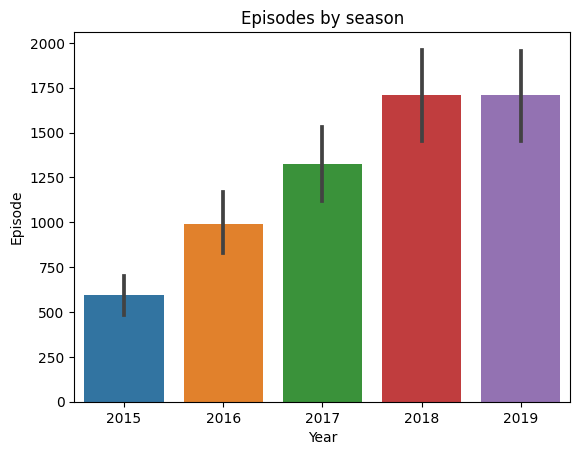

In [44]:
sns.barplot(data=df_loveisland_until_2020, x="Year", y="Episode", estimator="sum").set(title="Episodes by season");

## Getting all the graphs together

### Join the DF by the year

In [34]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26823,United Kingdom,2013,female,5-14 years,4.0,3559249,Generation Z


In [35]:
import src.joining as jn

In [36]:
df_join= jn.join_df(df_suicide_uk, df_loveisland_until_2020)# Joined both dataframes to get a graph of episodes(count) and suicide no.

In [37]:
df_join.Season.unique() #we can see on the DF there's no data from 2016 about the suicide rates, so, when relating both DF, season 2 is not accountable

array([nan,  1.,  3.,  4.,  5.])

In [38]:
df_join = jn.r_index(df_join)

In [39]:
seas_graph= jn.suic_gen_season(df_join)

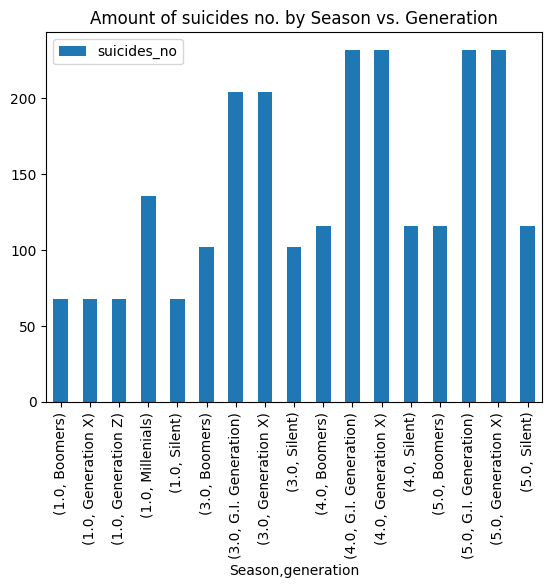

In [51]:
seas_graph.plot(kind="bar",title = 'Amount of suicides no. by Season vs. Generation');
plt.show()

/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/skyfly/miniconda3/envs/ironhack/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slic

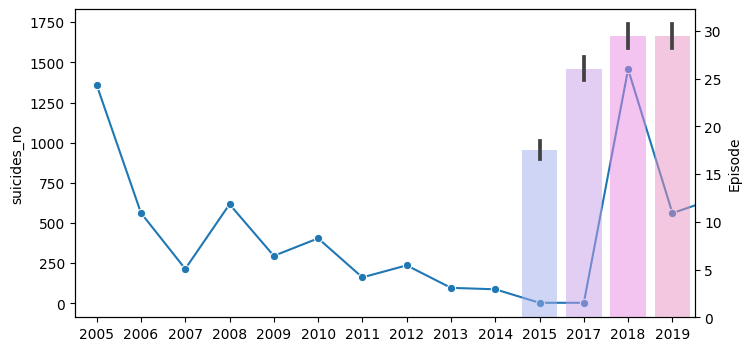

In [41]:
fig = jn.year_suic_season(df_join)